In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
Train = pd.read_csv('Train_SU63ISt.csv')
Test = pd.read_csv('Test_0qrQsBZ.csv')

In [3]:
Train.columns,Test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [4]:
Train.head(3)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6


In [5]:
Test.head(3)

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00


In [6]:
Train.dtypes,Test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [7]:
Train.shape,Test.shape

((18288, 3), (5112, 2))

In [8]:
Train['Datetime'] = pd.to_datetime(Train['Datetime'],format='%d-%m-%Y %H:%M')
Test['Datetime'] = pd.to_datetime(Test['Datetime'],format='%d-%m-%Y %H:%M')

In [9]:
Train.dtypes,Test.dtypes

(ID                   int64
 Datetime    datetime64[ns]
 Count                int64
 dtype: object, ID                   int64
 Datetime    datetime64[ns]
 dtype: object)

In [10]:
for dataframes in (Train,Test):
    dataframes['Year'] = dataframes['Datetime'].dt.year
    dataframes['Month'] = dataframes['Datetime'].dt.month
    dataframes['Day'] = dataframes['Datetime'].dt.day
    dataframes['Hour'] = dataframes['Datetime'].dt.hour
    dataframes['Day of Week'] = dataframes['Datetime'].dt.dayofweek
    dataframes['Weekend'] = 0
    dataframes['Weekend'][(dataframes['Day of Week']==5)|(dataframes['Day of Week']==6)] = 1

In [11]:
Train['Weekend'].value_counts()

0    13056
1     5232
Name: Weekend, dtype: int64

In [12]:
Train.head(2)

,ID,Datetime,Count,Year,Month,Day,Hour,Day of Week,Weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1


In [13]:
Train_Original = Train.copy()
Test_Original = Test.copy()

In [14]:
del Train['ID']

In [15]:
Train.head(2)

,Datetime,Count,Year,Month,Day,Hour,Day of Week,Weekend
0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,2012-08-25 01:00:00,2,2012,8,25,1,5,1


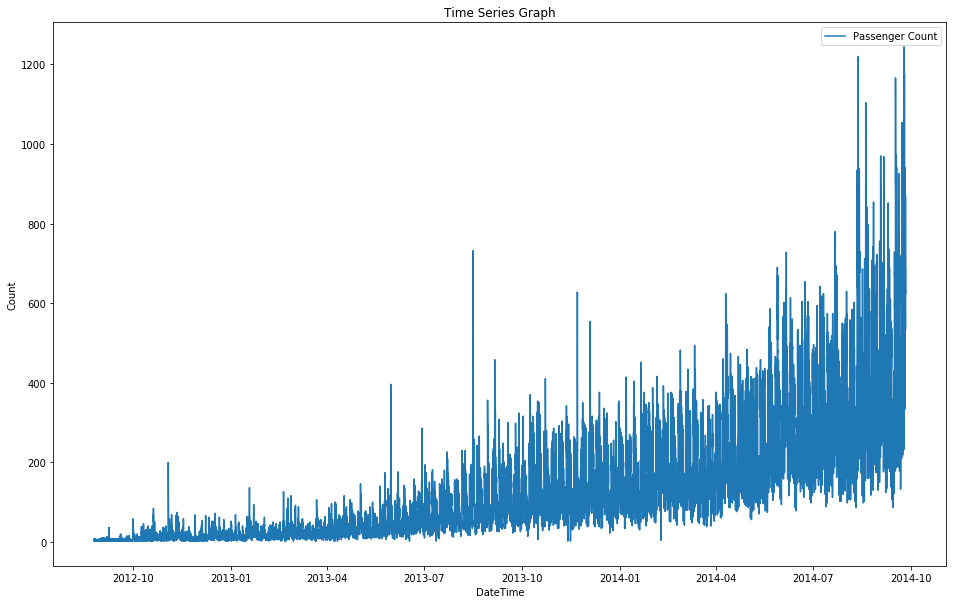

In [16]:
plt.figure(figsize=(16,10))
plt.plot(Train['Datetime'],Train['Count'],label='Passenger Count')
plt.title('Time Series Graph')
plt.xlabel('DateTime')
plt.ylabel('Count')
plt.legend(loc='best')

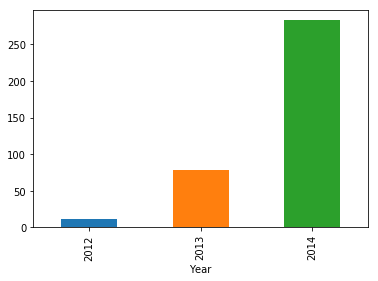

In [17]:
Train.groupby('Year')['Count'].mean().plot.bar()

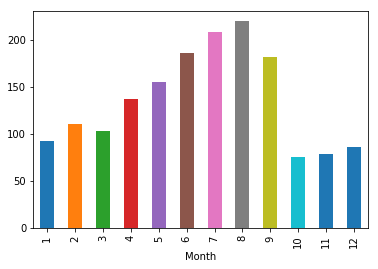

In [18]:
Train.groupby('Month')['Count'].mean().plot.bar()

In [19]:
temp = Train.groupby(['Year','Month'])['Count'].mean()

Text(0,0.5,'Count')

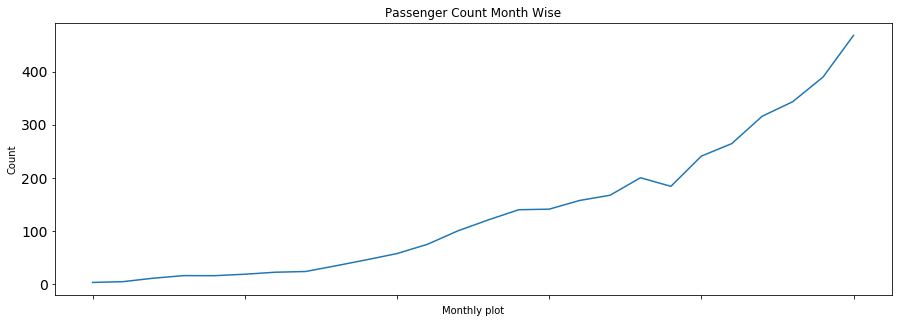

In [20]:
temp.plot(figsize=(15,5),title='Passenger Count Month Wise',fontsize=14)
plt.xlabel('Monthly plot')
plt.ylabel('Count')

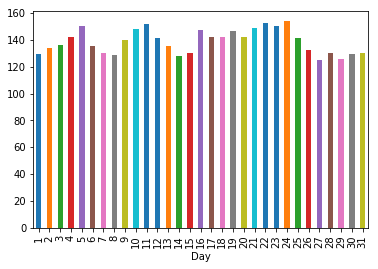

In [21]:
Train.groupby('Day')['Count'].mean().plot.bar()

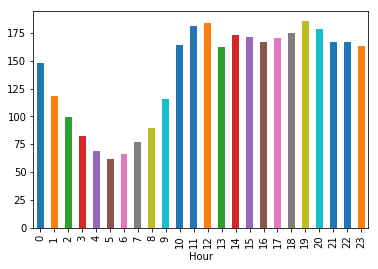

In [22]:
Train.groupby('Hour')['Count'].mean().plot.bar()

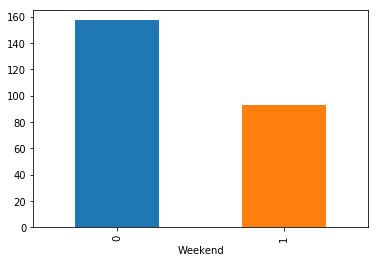

In [23]:
Train.groupby('Weekend')['Count'].mean().plot.bar()

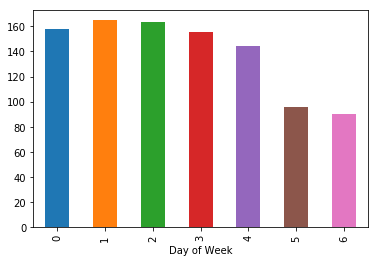

In [24]:
Train.groupby('Day of Week')['Count'].mean().plot.bar()

In [25]:
Train.index = Train['Datetime']

In [26]:
hourly = Train.resample('H').mean()
daily = Train.resample('D').mean()
weekly = Train.resample('W').mean()
monthly = Train.resample('M').mean()

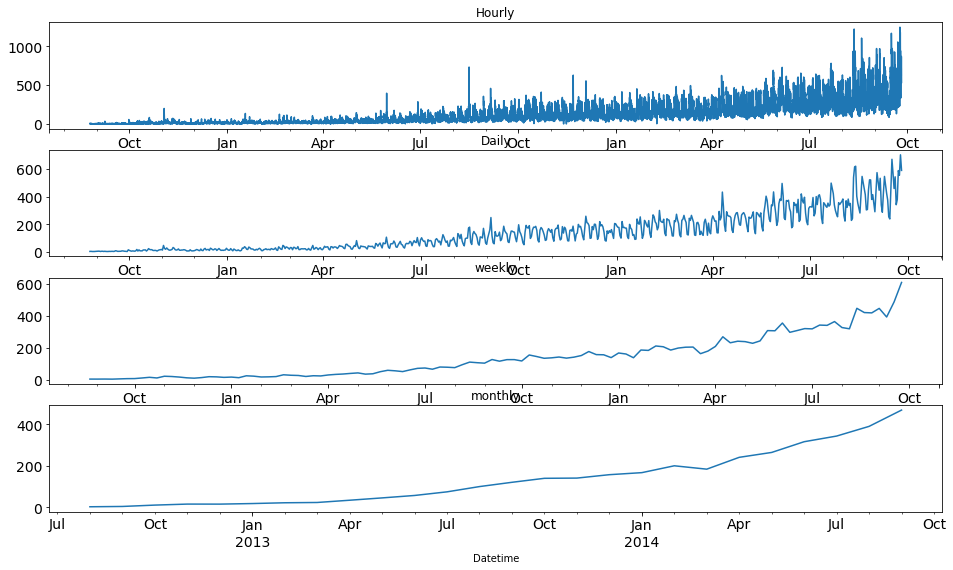

In [27]:
fig, axes = plt.subplots(4,1)
hourly.Count.plot(figsize=(16,9),ax=axes[0],title = 'Hourly',fontsize=14)
daily.Count.plot(figsize=(16,9),ax=axes[1],title='Daily',fontsize=14)
weekly.Count.plot(figsize=(16,9),ax=axes[2],title = 'weekly',fontsize=14)
monthly.Count.plot(figsize=(16,9),ax=axes[3],title='monthly',fontsize=14)

In [28]:
Test.index = Test['Datetime']

In [29]:
Test = Test.resample('D').mean()
Train = Train.resample('D').mean()

In [30]:
del Test['ID']
del Test['Hour']
del Train['Hour']

In [31]:
Train.tail(2)

,Count,Year,Month,Day,Day of Week,Weekend
Datetime,,,,,,
2014-09-24,702.333333,2014.0,9.0,24.0,2.0,0.0
2014-09-25,589.666667,2014.0,9.0,25.0,3.0,0.0


In [32]:
Test.head(2)

,Year,Month,Day,Day of Week,Weekend
Datetime,,,,,
2014-09-26,2014.0,9.0,26.0,4.0,0.0
2014-09-27,2014.0,9.0,27.0,5.0,1.0


In [33]:
X_Train = Train.ix['2012-08-25':'2014-06-24']
X_Test = Train.ix['2014-06-25':'2014-09-25']

In [34]:
X_Test_Pred = X_Test

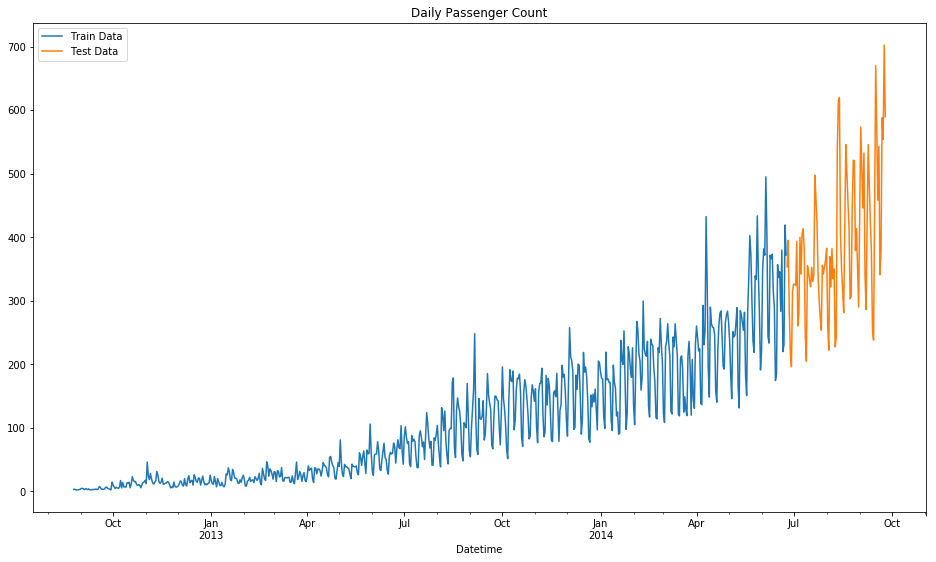

In [35]:
X_Train.Count.plot(figsize=(16,9),label='Train Data')
X_Test.Count.plot(figsize=(16,9),label='Test Data')
plt.title('Daily Passenger Count')
plt.legend()

# Testing the Stationarity of a series using Dickey fuller(Adfuller) Test

In [36]:
from statsmodels.tsa.stattools import adfuller

In [72]:
def test_stationarity(timeseries):
    
    #for manual observation of stationarity - we are plotting the graph
    plt.figure(figsize = (16,9))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(pd.rolling_mean(timeseries,window=24),color='red',label = 'Rolling Mean')
    plt.plot(pd.rolling_std(timeseries,window=24),color='green',label = 'Rolling Standard deviation')
    plt.title('Rolling Mean and Standard Deviation')
    plt.legend(loc='best')
    plt.show()
    #for therortical confirmation of stationarity we are performing dickey fuller test.
    dftest = adfuller(timeseries, autolag = 'AIC')
    new_list = ['Test Statistic','p-value','#Lags Used', 'Number of Observations Used','Critical Value for','Unknown']
    for i in range(len(dftest)):
        print (new_list[i],dftest[i])

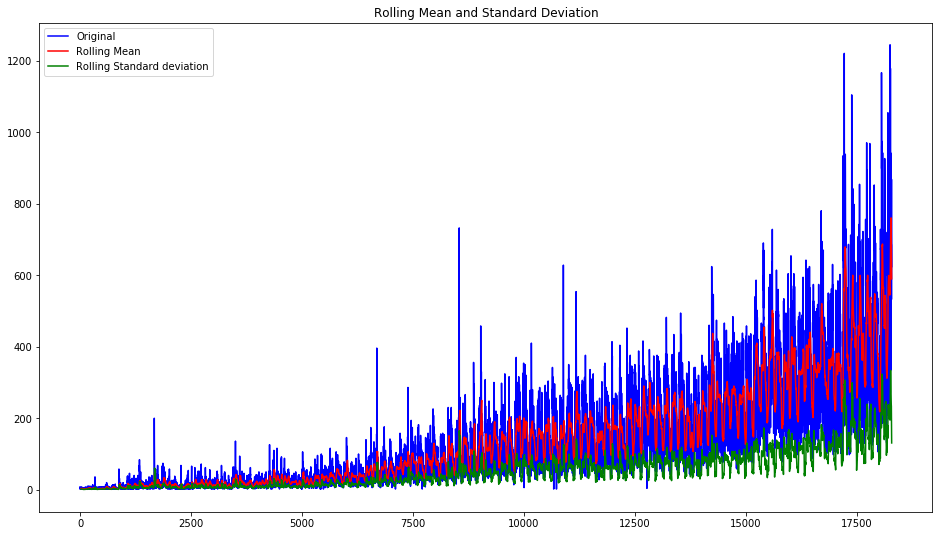

Test Statistic -4.456560536856805
p-value 0.00023540466467667108
#Lags Used 45
Number of Observations Used 18242
Critical Value for {'1%': -3.430708525404171, '5%': -2.861698454786869, '10%': -2.5668543412994906}
Unknown 181026.8337109476


In [75]:
test_stationarity(Train_Original['Count'])

# For Hourly Time series - Eventhough T-statistics is lesser than Critical value we could see trend and seasonality

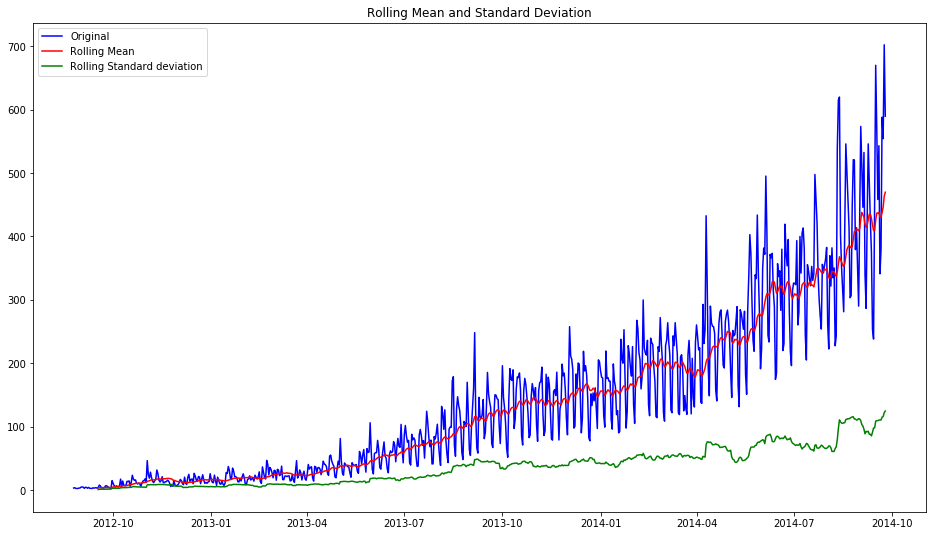

Test Statistic 2.9863509590138624
p-value 1.0
#Lags Used 20
Number of Observations Used 741
Critical Value for {'1%': -3.4392057325732104, '5%': -2.8654483492874236, '10%': -2.5688512291811225}
Unknown 7212.068059584323


In [76]:
test_stationarity(Train['Count'])

# For Daily Time series -  We clearly see that Test Statistics is greater than Critical values. Hence time series is not stationary, we have to make it stationary

# Removing Trend by taking log Subtracting it with Moving Average

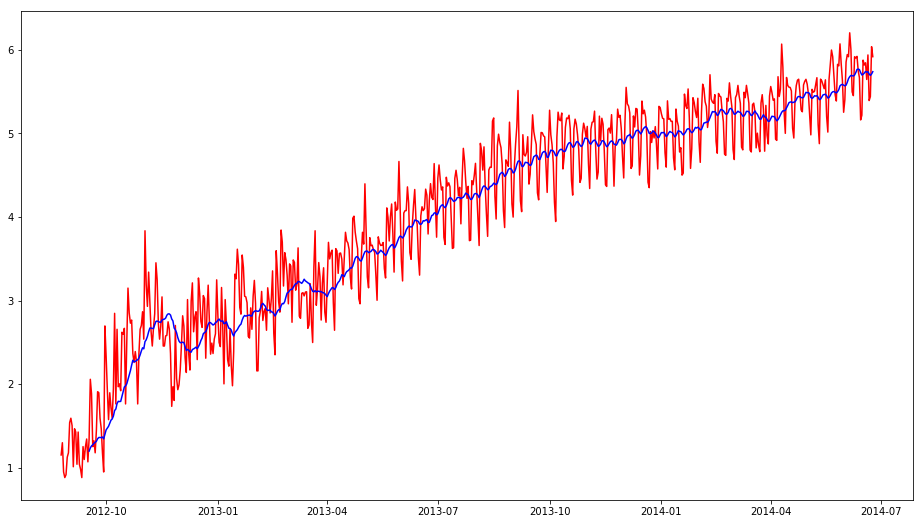

In [83]:
X_Train_log = np.log(X_Train['Count'])
X_Test_log = np.log(X_Test['Count'])
moving_avg_log = pd.rolling_mean(X_Train_log,24)
plt.figure(figsize=(16,9))
plt.plot(X_Train_log,color='red')
plt.plot(moving_avg_log,color='blue')
plt.show()

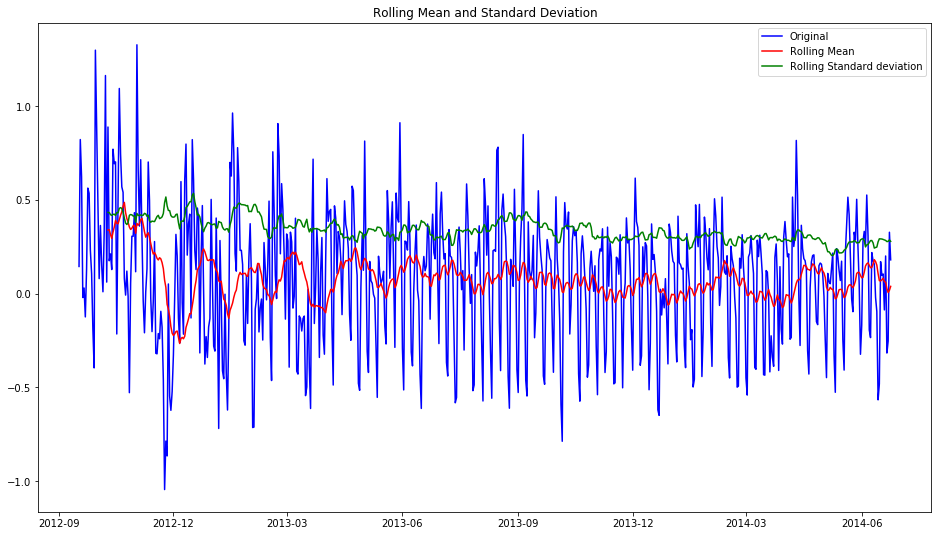

Test Statistic -5.861645522775964
p-value 3.3994222693861414e-07
#Lags Used 20
Number of Observations Used 625
Critical Value for {'1%': -3.440856177517568, '5%': -2.86617548304384, '10%': -2.56923863104}
Unknown 16.2381378419052


In [87]:
X_Train_log_moving_avg_log_diff = X_Train_log - moving_avg_log
X_Train_log_moving_avg_log_diff.dropna(inplace=True)
test_stationarity(X_Train_log_moving_avg_log_diff)

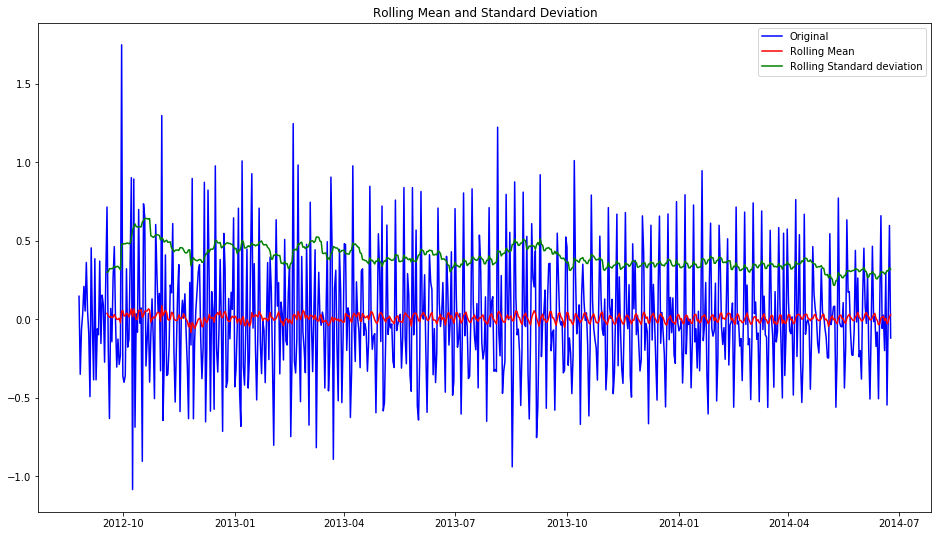

Test Statistic -8.237567849678973
p-value 5.834049398268144e-13
#Lags Used 19
Number of Observations Used 648
Critical Value for {'1%': -3.4404817800778034, '5%': -2.866010569916275, '10%': -2.569150763698369}
Unknown 115.79917596602127


In [88]:
X_Train_log_diff = X_Train_log - X_Train_log.shift(1)
X_Train_log_diff.dropna(inplace=True)
test_stationarity(X_Train_log_diff)

# Removing Seasonality

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [104]:
decomposition = seasonal_decompose(X_Train_log,freq=24)

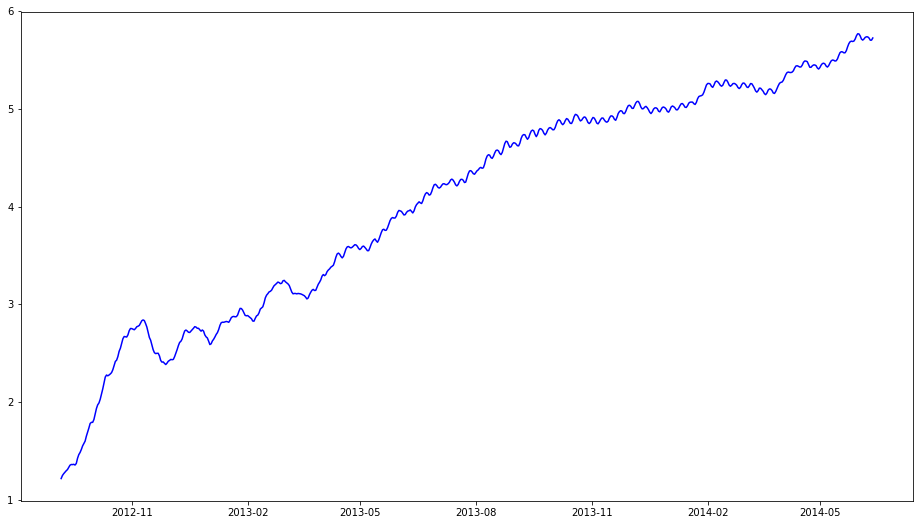

In [111]:
plt.figure(figsize=(16,9))
plt.plot(decomposition.trend,color='blue')

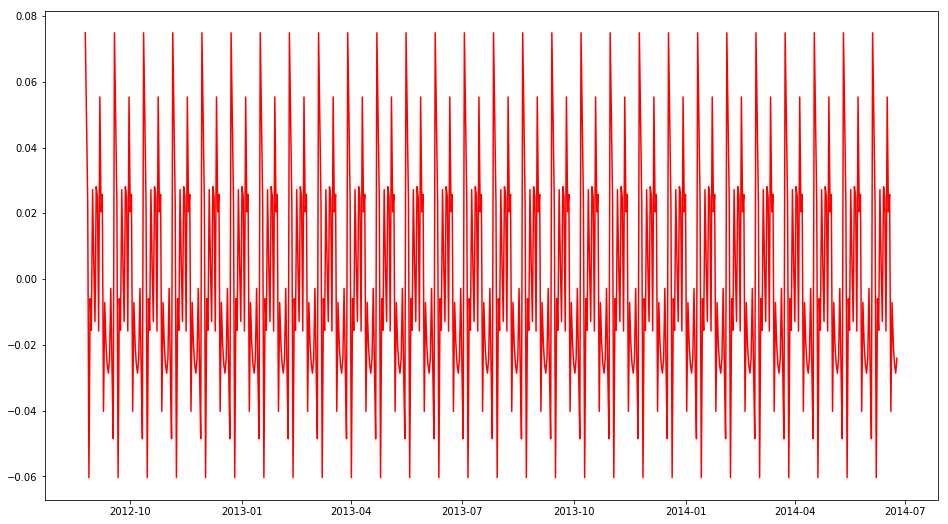

In [112]:
plt.figure(figsize=(16,9))
plt.plot(decomposition.seasonal,color='red')

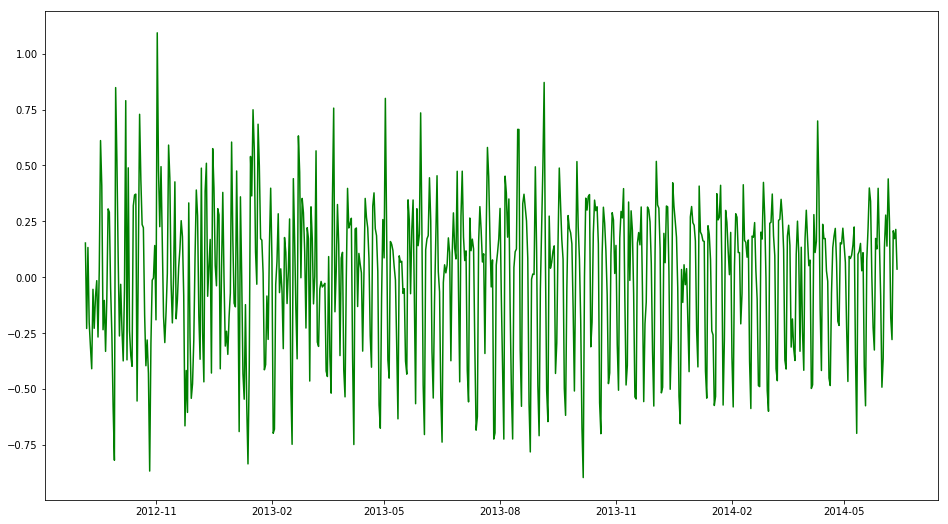

In [114]:
plt.figure(figsize=(16,9))
plt.plot(decomposition.resid,color='green')

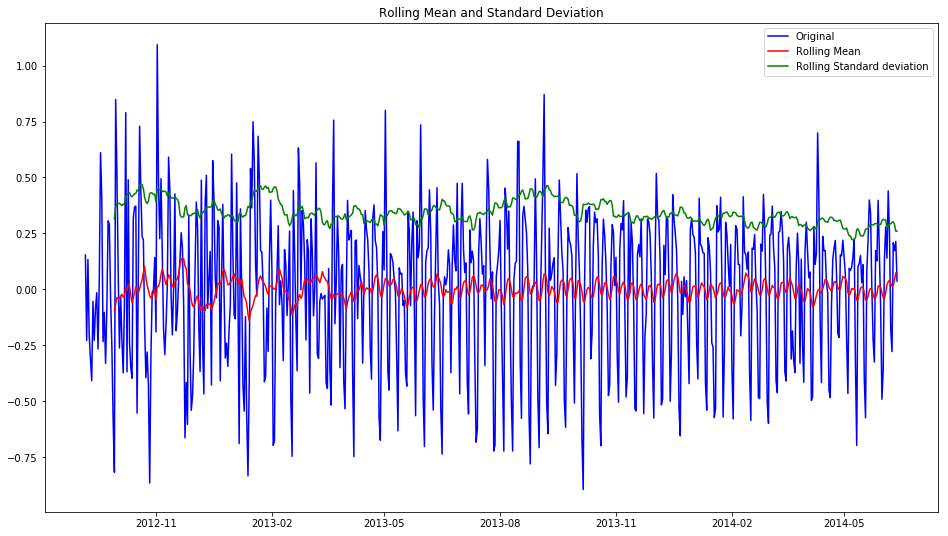

Test Statistic -7.822096039408336
p-value 6.628320880211478e-12
#Lags Used 20
Number of Observations Used 624
Critical Value for {'1%': -3.440873084361836, '5%': -2.866182929627575, '10%': -2.5692425987220577}
Unknown -31.688840304840596


In [116]:
test_stationarity((decomposition.resid).dropna())

In [117]:
from statsmodels.tsa.stattools import acf,pacf

In [118]:
lag_acf = acf(X_Train_log_diff,nlags=20)
lag_pacf = pacf(X_Train_log_diff,nlags=20,method='ols')

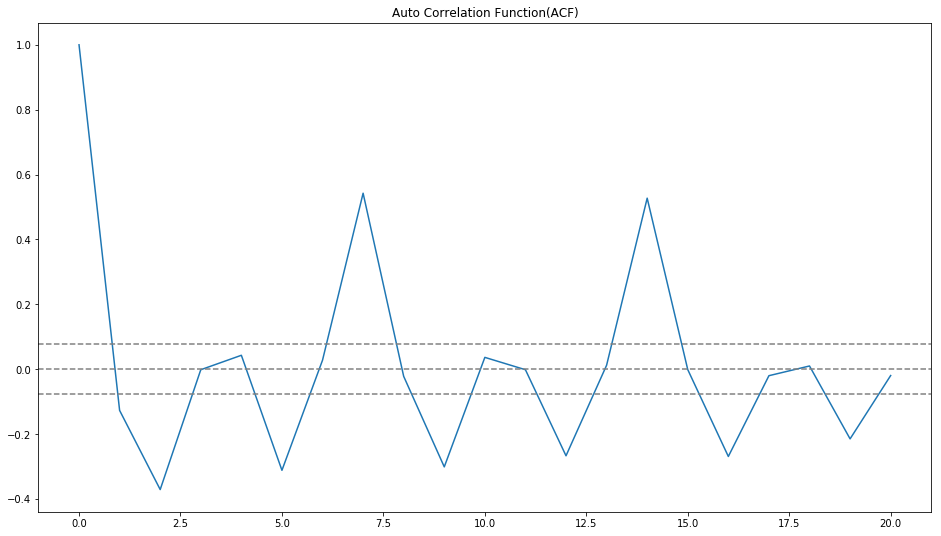

In [130]:
plt.figure(figsize=(16,9))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/(np.sqrt(len(X_Train_log_diff))),linestyle='--',color='gray')
plt.axhline(y=1.96/(np.sqrt(len(X_Train_log_diff))),linestyle='--',color='gray')
plt.title('Auto Correlation Function(ACF)')
plt.show()

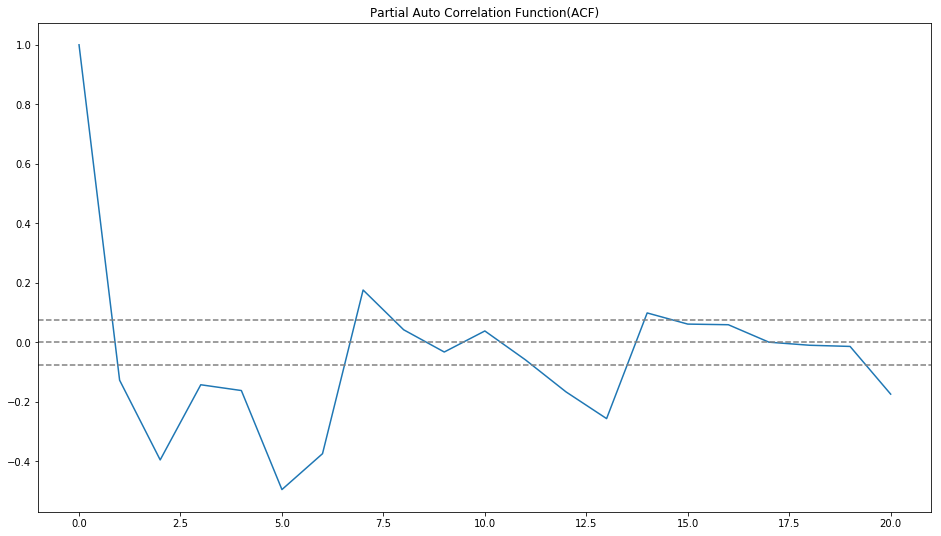

In [131]:
plt.figure(figsize=(16,9))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X_Train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(X_Train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Auto Correlation Function(ACF)')
plt.show()

In [132]:
from statsmodels.tsa.arima_model import ARIMA

In [230]:
def Original_Prediction(Predict_df,Test_df):
    Predict_df = Predict_df.cumsum().shift().fillna(0)
    Predict_df_constant = pd.Series(np.ones(Test_df.shape[0]) * np.log(Test_df['Count'])[0],index = Test_df.index)
    Predict_df = np.exp(Predict_df.add(Predict_df_constant,fill_value=0))
    plt.figure(figsize=(16,9))
    plt.plot(Predict_df,color='blue',label='Predict')
    plt.plot(Test_df['Count'],label='Test')
    plt.legend(loc='best')
    plt.title('RMSE %.4f'% (np.sqrt(np.dot(Predict_df,Test_df['Count']))/Test_df.shape[0]))
    plt.show()
    return Predict_df

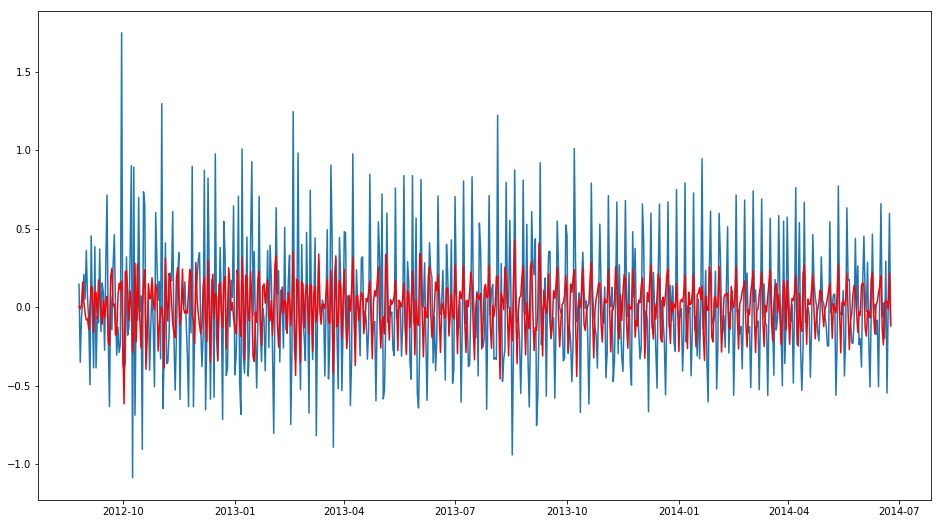

In [231]:
model_AR = ARIMA(X_Train_log, order=(2,1,0))
results_AR = model_AR.fit(disp=-1)  
plt.figure(figsize=(16,9))
plt.plot(X_Train_log_diff)
plt.plot(results_AR.fittedvalues, color='red')

In [232]:
print (X_Test.head(1))
print (X_Test.tail(1))

                 Count    Year  Month   Day  Day of Week  Weekend
Datetime                                                         
2014-06-25  353.666667  2014.0    6.0  25.0          2.0      0.0
                 Count    Year  Month   Day  Day of Week  Weekend
Datetime                                                         
2014-09-25  589.666667  2014.0    9.0  25.0          3.0      0.0


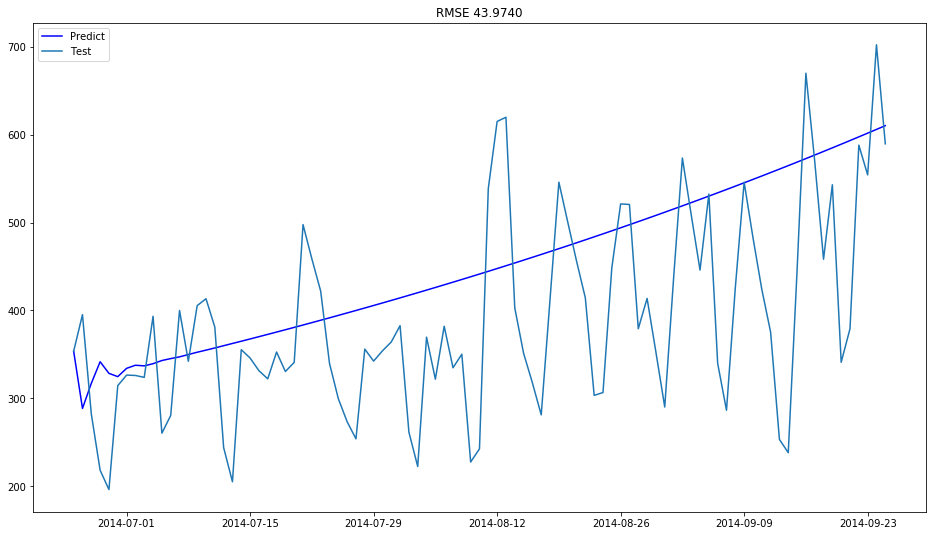

In [233]:
AR_Predict = results_AR.predict(start="2014-06-25",end="2014-09-25")
AR_Predict = Original_Prediction(AR_Predict,X_Test)

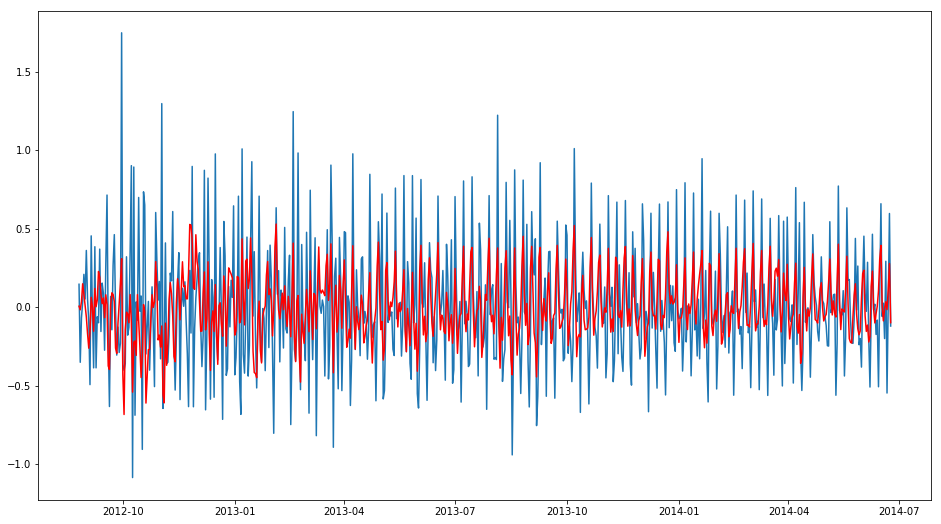

In [234]:
model_MA = ARIMA(X_Train_log,order=(0,1,2))
results_MA = model_MA.fit(disp=-1)
plt.figure(figsize=(16,9))
plt.plot(X_Train_log_diff)
plt.plot(results_MA.fittedvalues,color='red')

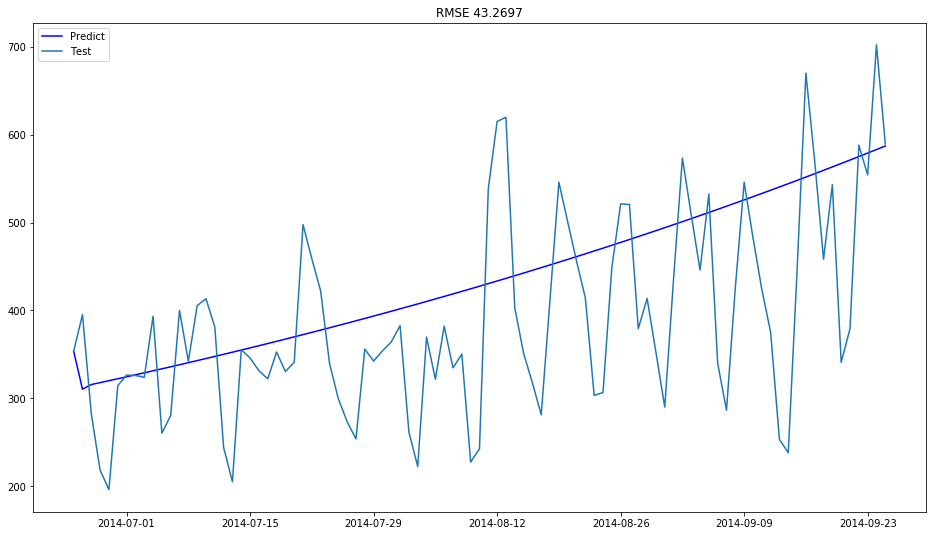

In [235]:
MA_Predict = results_MA.predict(start="2014-06-25",end="2014-09-25")
MA_Predict = Original_Prediction(MA_Predict,X_Test)

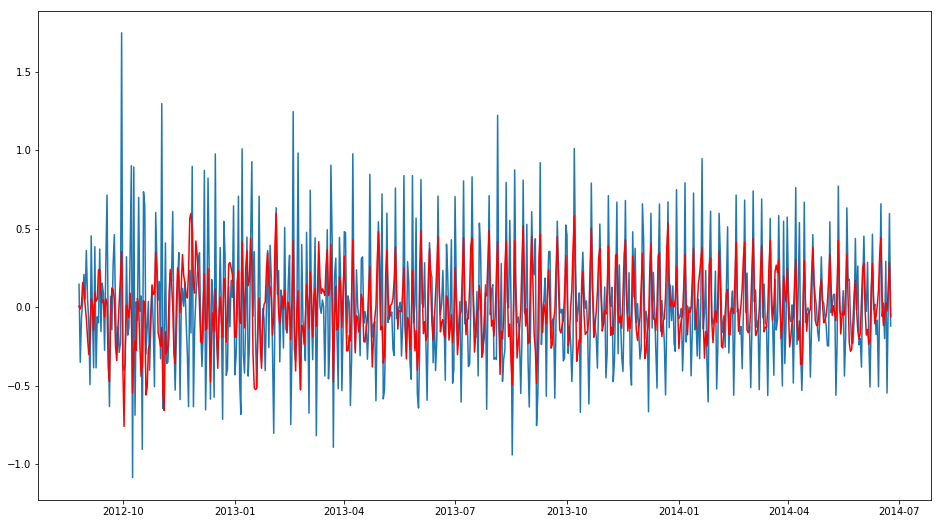

In [236]:
model_ARIMA = ARIMA(X_Train_log,order=(2,1,2))
results_ARIMA = model_ARIMA.fit(disp=-1)
plt.figure(figsize=(16,9))
plt.plot(X_Train_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')

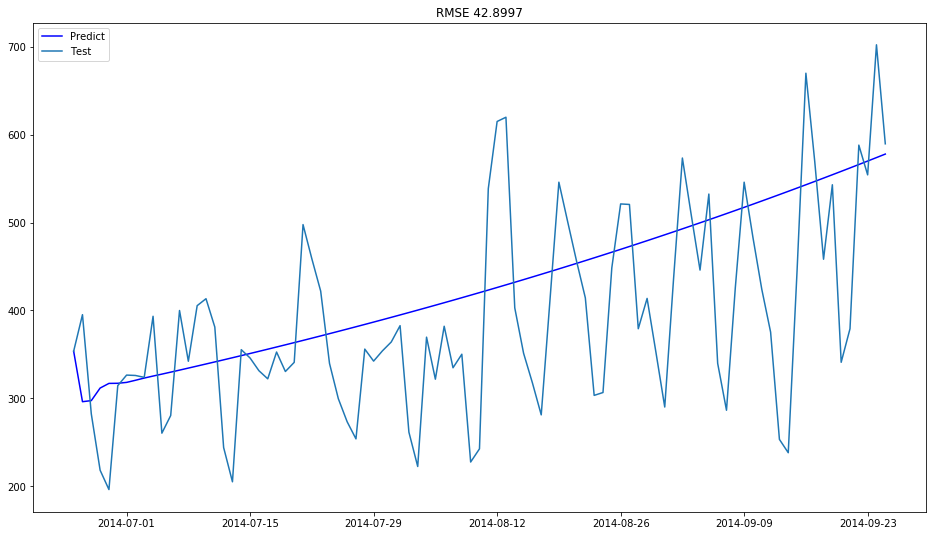

In [237]:
ARIMA_Predict = results_ARIMA.predict(start="2014-06-25",end="2014-09-25")
ARIMA_Predict = Original_Prediction(ARIMA_Predict,X_Test)

# SARIMAX

In [242]:
import statsmodels.api as sm

In [243]:
SARIMAX = sm.tsa.statespace.SARIMAX

In [407]:
sarima_fit = SARIMAX(X_Train['Count'],order=(1,1,1),seasonal_order=(0,1,1,7)).fit()

In [408]:
y_hat_avg = X_Test.copy()
y_hat_avg['SARIMA']= sarima_fit.predict(start="2014-06-24",end="2014-09-25",dynamic=True)

In [409]:
from sklearn.metrics import mean_squared_error
from math import sqrt

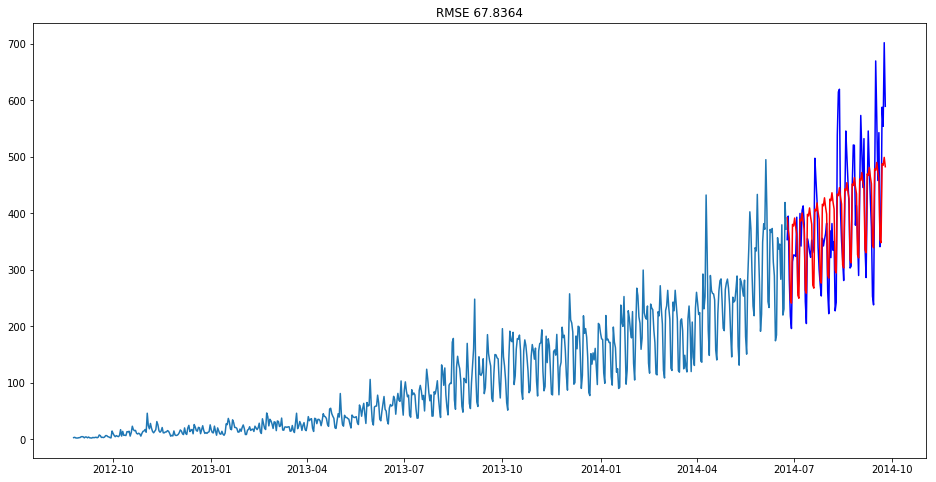

In [410]:
plt.figure(figsize=(16,8))
plt.plot(y_hat_avg['Count'],label='Original',color='blue')
plt.plot(y_hat_avg['SARIMA'],label='Prediction',color='red')
plt.plot(X_Train['Count'])
plt.title('RMSE %.4f'% (sqrt(mean_squared_error(y_hat_avg['Count'],y_hat_avg['SARIMA']))))
plt.show()


In [411]:
Test['SARIMA'] = sarima_fit.predict(start="2014-06-24",end="2015-04-26",dynamic=True)

In [431]:
submission = pd.read_csv('Sample_Submission_QChS6c3.csv')
submission['ID'] = Test_Original['ID']
Train_Original['ratio'] = Train_Original['Count']/Train_Original['Count'].sum()
temp = Train_Original.groupby(['Hour'])['ratio'].sum()
new_dict = {}
for i,value in enumerate(temp):
    new_dict[i] = value
new_dict
pd.DataFrame(temp).to_csv('Groupby.csv')

In [432]:
merge=pd.merge(Test, Test_Original, on=('Day' , 'Month', 'Year'), how='left')
merge['SARIMA'] = merge['Hour'].map(new_dict) * merge['SARIMA'] * 24 
submission['Count'] = merge['SARIMA'].round().astype('int')
submission.to_csv('Submission.csv',index=False)

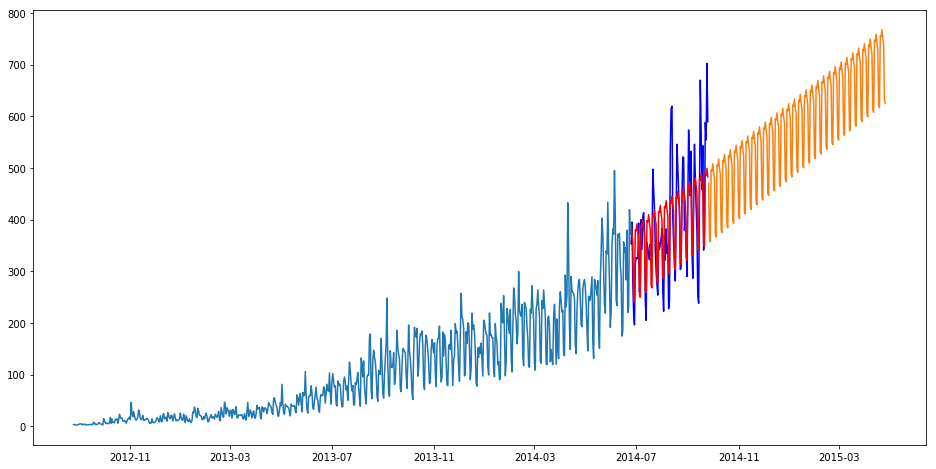

In [416]:
plt.figure(figsize=(16,8))
plt.figure(figsize=(16,8))
plt.plot(y_hat_avg['Count'],label='Original',color='blue')
plt.plot(y_hat_avg['SARIMA'],label='Prediction',color='red')
plt.plot(X_Train['Count'])
plt.plot(Test['SARIMA'])
plt.show()


In [417]:
Test['SARIMA'].head(7)

Datetime
2014-09-26    470.450044
2014-09-27    362.585992
2014-09-28    357.230562
2014-09-29    496.843203
2014-09-30    494.202919
2014-10-01    508.226074
2014-10-02    491.718875
Freq: D, Name: SARIMA, dtype: float64

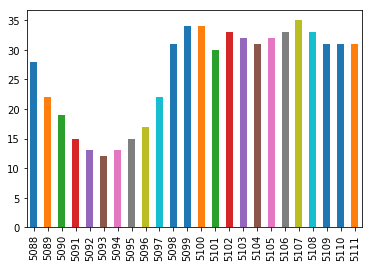

In [418]:
submission['Count'].tail(24).plot.bar()

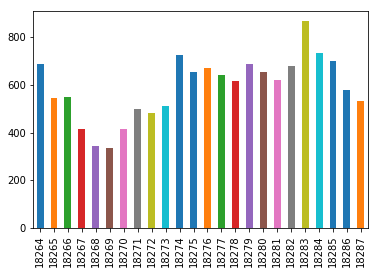

In [424]:
Train_Original['Count'].tail(24).plot.bar()

In [430]:
Train_Original

,ID,Datetime,Count,Year,Month,Day,Hour,Day of Week,Weekend,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1,7.870093e-07
5,5,2012-08-25 05:00:00,2,2012,8,25,5,5,1,7.870093e-07
6,6,2012-08-25 06:00:00,2,2012,8,25,6,5,1,7.870093e-07
7,7,2012-08-25 07:00:00,2,2012,8,25,7,5,1,7.870093e-07
8,8,2012-08-25 08:00:00,6,2012,8,25,8,5,1,2.361028e-06
9,9,2012-08-25 09:00:00,2,2012,8,25,9,5,1,7.870093e-07


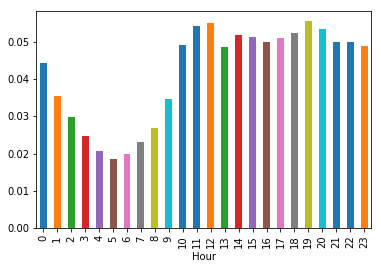

In [419]:
temp.plot.bar()